# Pre-processing

In [2]:



import pandas as pd
import numpy as np

data = pd.read_csv('tcc_ceds_music.csv')

Xall=data.drop(['Unnamed: 0','artist_name','track_name','lyrics','len','loudness','topic','age'],axis=1)


#show how many release dates are before 1990
print(len(Xall[Xall['release_date']<=1990]))

#show how many release dates are after1990
print(len(Xall[Xall['release_date']>1990]))

#if song is <=1990, make encodedDate = -1, else make encodedDate = 1
Xall['encodedDate']=np.where(Xall['release_date']<=1990,-1,1)


Xall=Xall.drop(['release_date'],axis=1)

#one hot encode the genre
Xall=pd.get_dummies(Xall,columns=['genre'])

print(Xall.keys())

y=Xall['encodedDate']

Xall=Xall.drop(['encodedDate'],axis=1)

#make y -1 if negative, +1 if positive
y_all=np.sign(y)

print(y.head())


13915
14457
Index(['dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'like/girls', 'sadness', 'feelings', 'danceability', 'acousticness',
       'instrumentalness', 'valence', 'energy', 'encodedDate', 'genre_blues',
       'genre_country', 'genre_hip hop', 'genre_jazz', 'genre_pop',
       'genre_reggae', 'genre_rock'],
      dtype='object')
0   -1
1   -1
2   -1
3   -1
4   -1
Name: encodedDate, dtype: int64


In [3]:
#count how many of X are from before 1984.5

print('number of songs before ',len(y[y==-1]))
print('number of songs after ',len(y[y==1]))

number of songs before  13915
number of songs after  14457


In [4]:

#print statistics on X


#split into test and train with 20% test

from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(Xall,y_all,test_size=.2, random_state=1)

X=X.values
y=y.values

## FROM NOW ON ONLY USE X AND y


In [44]:
print(X[4])

[0.00877193 0.00877193 0.00877193 0.00877193 0.00877193 0.00877193
 0.00877193 0.00877193 0.00877193 0.00877193 0.23439731 0.00877193
 0.00877193 0.1622173  0.33441904 0.13738739 0.32849561 0.86646573
 0.03248988 0.26215993 0.10808025 1.         0.         0.
 0.         0.         0.         0.        ]


# TREE CLASSIFIERS (W/ pruning)

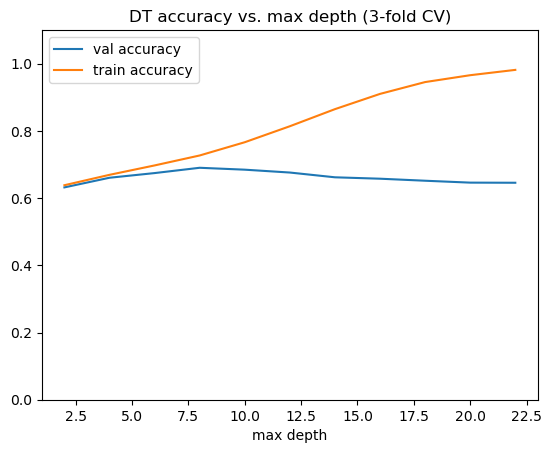

[0.6319383259911894, 0.6606461086637299, 0.6745227606461087, 0.6903083700440528, 0.684654919236417, 0.6761380323054332, 0.6619676945668136, 0.6577826725403818, 0.6517621145374449, 0.6461086637298091, 0.645741556534508]


In [45]:
#fit tree classifier

from sklearn.tree import DecisionTreeClassifier
#import accuracy score
from sklearn.metrics import accuracy_score

#plot depth vs accuracy
val_accuracies=[]
train_accuracies=[]
NBFOLDS=3
PARAMRANGE=range(1,12)
for i in PARAMRANGE:  #1,30 is the range of max_depth

    #divide into train and validation, implementing cross validation

    val_average=0
    train_average=0
    for j in range(NBFOLDS):
        
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=j)
        #fit tree classifier
        tree = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=i*2,random_state=1) #should overfit
        tree.fit(X_train,y_train)
        #predict
        y_pred = tree.predict(X_val)
        #accuracy
        val_average+=(accuracy_score(y_val, y_pred))
        #train accuracy
        y_pred_train = tree.predict(X_train)
        train_average+=(accuracy_score(y_train, y_pred_train))
    val_accuracies.append(val_average/NBFOLDS)
    train_accuracies.append(train_average/NBFOLDS)
    




import matplotlib.pyplot as plt
plt.plot([2*x for x in PARAMRANGE],val_accuracies)
plt.plot([2*x for x in PARAMRANGE],train_accuracies)

#add legends to the graphs
plt.legend(['val accuracy','train accuracy'])
plt.xlabel('max depth')
#rescale the y axis to show 0
plt.ylim(.0,1.1)
plt.title('DT accuracy vs. max depth (3-fold CV)')

plt.show()

print(val_accuracies)

In [44]:
sfa=range(1,12)
#make it range 2 24
sfa=[2*x for x in sfa]

#make 8 depth DT and get score and time
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=8)
#time
import time
start_time = time.time()
#fit tree classifier
tree = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=7,random_state=1) #should overfit
tree.fit(X_train,y_train)

#end time
print("--- %s seconds ---" % (time.time() - start_time))
#predict
y_pred = tree.predict(X_val)
#accuracy
print(accuracy_score(y_val, y_pred))



--- 0.5762679576873779 seconds ---
0.6962555066079296


# SVMs

a
a
a
a


(0.0, 1.1)

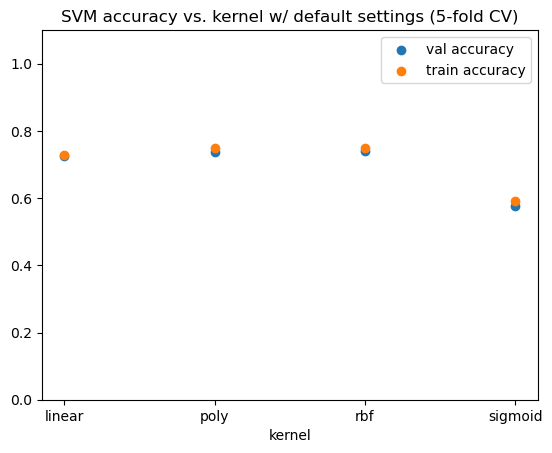

In [4]:
#fit SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
kernelsToTry=['linear','poly','rbf','sigmoid']

FOLDS=1

#plot depth vs accuracy
val_accuracies=[]
train_accuracies=[]
for i in range(len(kernelsToTry)):
    #divide into train and validation, implementing cross validation

    val_average=0
    train_average=0
    for j in range(FOLDS): #5 fold cross validation
        print("")


        #0.split set randomly (different split each loop)
        #1.fit classifer
        #2. predict for val and test
        
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=j)
        
        #fit SVM classifier
        svm = SVC(kernel=kernelsToTry[i],random_state=1)
        svm.fit(X_train,y_train)

        #predict
        y_pred = svm.predict(X_val)
        #accuracy
        val_average+=(accuracy_score(y_val, y_pred))

        #train accuracy
        y_pred_train = svm.predict(X_train)
        train_average+=(accuracy_score(y_train, y_pred_train))




    val_accuracies.append(val_average/FOLDS)
    train_accuracies.append(train_average/FOLDS)
    




import matplotlib.pyplot as plt

#make scatter plot graphing val accracy and train accuracy for each kernel
plt.scatter(kernelsToTry,val_accuracies)
plt.scatter(kernelsToTry,train_accuracies)

#add legends to the graphs
plt.legend(['val accuracy','train accuracy'])
plt.title('SVM accuracy vs. kernel w/ default settings (5-fold CV)')
plt.xlabel('kernel')
#rescale the y axis to show 0
plt.ylim(0,1.1)


In [6]:
print(val_accuracies)

[0.7264317180616741, 0.7374449339207049, 0.7394273127753304, 0.5751101321585903]


In [4]:
#fit SVM
from sklearn.svm import SVC

#degree, gamma (can be 'auto')

param_combinations = [


    1,1.4,0.2,0.4
]

from sklearn.metrics import accuracy_score

#0.01 looks good for gamma
#gamma,C

FOLDS=1

#plot depth vs accuracy
val_accuracies=[]
train_accuracies=[]
for i in range(len(param_combinations)):
    #divide into train and validation, implementing cross validation

    val_average=0
    train_average=0
    for j in range(FOLDS): #5 fold cross validation
        print('working')

        #0.split set randomly (different split each loop)
        #1.fit classifer
        #2. predict for val and test
        
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=j)
        
        #fit SVM classifier


        svm = SVC(kernel='poly',degree=3,gamma=param_combinations[i],random_state=1)
        svm.fit(X_train,y_train)
        #end timer

        #predict
        y_pred = svm.predict(X_val)
        #accuracy
        val_average+=(accuracy_score(y_val, y_pred))

        #train accuracy
        y_pred_train = svm.predict(X_train)
        train_average+=(accuracy_score(y_train, y_pred_train))




    val_accuracies.append(val_average/FOLDS)
    train_accuracies.append(train_average/FOLDS)
print(val_accuracies)


working
working
working
working
[0.7374449339207049, 0.7323788546255506, 0.7273127753303965, 0.7345814977973568]


5
5


(0.0, 1.1)

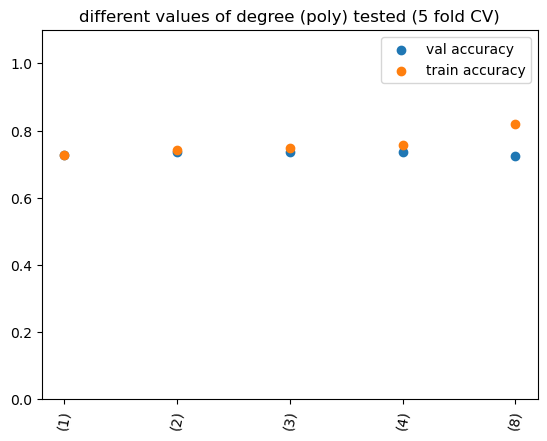

In [6]:
import matplotlib.pyplot as plt

#make scatter plot graphing val accracy and train accuracy for each kernel

print(len(param_combinations))
print(len(val_accuracies))
plt.scatter(range(len(param_combinations)),val_accuracies)
plt.scatter(range(len(param_combinations)),train_accuracies)


#add legends to the graphs
plt.legend(['val accuracy','train accuracy'])
plt.title("different values of degree (poly) tested (5 fold CV)")
plt.xticks(range(len(param_combinations)), [f"({gamma})" for gamma in param_combinations], rotation=80)


#rescale the y axis to show 0
plt.ylim(0,1.1)


#large C = overfit, small margin OK https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
#high gamma : only local points matter, low gamma: far points matter
# so high high gamma you can have very complex decision boundaries, and overfitting

In [46]:
#fit SVM
from sklearn.svm import SVC

param1_values = np.linspace(0.001, 0.02, 5)
param2_values = np.linspace(0.02, 100,4 )

param_combinations = [(param1, param2) for param1 in param1_values for param2 in param2_values]



#0.01 looks good for gamma
#gamma,C



#plot depth vs accuracy
val_accuracies=[]
train_accuracies=[]
for i in range(len(param_combinations)):
    #divide into train and validation, implementing cross validation

    val_average=0
    train_average=0
    for j in range(5): #5 fold cross validation

        #0.split set randomly (different split each loop)
        #1.fit classifer
        #2. predict for val and test
        
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=j)
        
        #fit SVM classifier
        svm = SVC(kernel='rbf',C=param_combinations[i][1],gamma=param_combinations[i][0],random_state=1)
        svm.fit(X_train,y_train)

        #predict
        y_pred = svm.predict(X_val)
        #accuracy
        val_average+=(accuracy_score(y_val, y_pred))

        #train accuracy
        y_pred_train = svm.predict(X_train)
        train_average+=(accuracy_score(y_train, y_pred_train))




    val_accuracies.append(val_average/5)
    train_accuracies.append(train_average/5)
    




import matplotlib.pyplot as plt

#make scatter plot graphing val accracy and train accuracy for each kernel

print(len(param_combinations))
print(len(val_accuracies))
plt.scatter(range(len(param_combinations)),val_accuracies)
plt.scatter(range(len(param_combinations)),train_accuracies)


#add legends to the graphs
plt.legend(['val accuracy','train accuracy'])
plt.xticks(range(len(param_combinations)), [f"({round(gamma,3)}, {round(C,3)})" for gamma, C in param_combinations], rotation=80)

#rescale the y axis to show 0
plt.ylim(0,1.1)


#large C = overfit, small margin OK https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
#high gamma : only local points matter, low gamma: far points matter
# so high high gamma you can have very complex decision boundaries, and overfitting




# NOW ANN

In [22]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, confusion_matrix

import tensorflow as tf
from tensorflow import keras
keras.utils.set_random_seed(1)
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model


verbose, epochs, batch_size = 1, 10, 32
activationFunction='relu'

def getModel(p):
    # model = Sequential()
    # model.add(Dense(9, input_dim = X_train.shape[1], activation='sigmoid'))

    # model.add(Dense(6, activation='relu'))
    


    # model.add(Dense(1, activation='sigmoid'))
    
    # model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # return model

    model = keras.Sequential([
    keras.layers.Input(shape=(28,)),  # Input layer with 2 features (height and weight)
    keras.layers.Dense(p[0], activation='relu'),  # Hidden layer 
    keras.layers.Dense(p[1], activation='relu'),  # Hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation
])
    return model





In [33]:
## for tensorflow you want y 0 or 1

y[y==-1]=0
import matplotlib.pyplot as plt

def getAccuracies(p,numfolds,plotGraphs=True):
    NUMFOLDS=numfolds
    class CustomCallback(keras.callbacks.Callback):
        def on_train_batch_begin(self, batch, logs=None):
            keys = list(logs.keys())


            #print current loss and validation loss
            #print(f"Batch {batch}: Current Loss = {logs['loss']}, Validation Loss = {logs['val_loss']}")

    
    model = getModel(p)


    optimizer='adam'
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



    skf = StratifiedKFold(n_splits=NUMFOLDS, shuffle=True, random_state=42)


    foldNum=0

    histories=[]
    for train_index, val_index in skf.split(X, y):
        model = getModel(p)

        #change adam learning rate
        optimizer=keras.optimizers.Adam(learning_rate=0.0001)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        foldNum+=1


        Xtrain, Xval = X[train_index], X[val_index]
        Ytrain, Yval = y[train_index], y[val_index]
        
        #BEGIN time

        
        history = model.fit(Xtrain, Ytrain, 
                            validation_data = (Xval, Yval), 
                            epochs=epochs, 
                            batch_size=batch_size,
                            callbacks=[CustomCallback()],
                            verbose=verbose)
        
        #print networks prediction on Xtrain[0]
        #TODO
        print(model.predict(Xtrain[0].reshape(1, -1)))
        #print actual ytrain.head
        #TODO
        print(Ytrain[0])
        
        #END time

        #print info on history
        #print(history.history.keys())
        #print(history.history['accuracy'])
        histories.append(history)


    #plot relevant stuff with matplotlib
    #Histories has a list of keras history objects

    #average them out

    accuracyPerEpoch=np.zeros(epochs)
    val_accuracyPerEpoch=np.zeros(epochs)
    counter=0
    for h in histories:
        counter=0
        for e in h.history['accuracy']:
            accuracyPerEpoch[counter]+=e
            counter+=1

        counter=0
        for e in h.history['val_accuracy']:
            val_accuracyPerEpoch[counter]+=e
            counter+=1
        

    #print(accuracyPerEpoch/NUMFOLDS)
    #print(val_accuracyPerEpoch/NUMFOLDS)

    #plot these two
    if(plotGraphs):
        plt.plot(range(epochs),accuracyPerEpoch/NUMFOLDS)
        plt.plot(range(epochs),val_accuracyPerEpoch/NUMFOLDS)

        #legend
        plt.legend(['train accuracy','val accuracy'])
        plt.title('Simpler model (23,20) (5 fold CV))')
        
        plt.xlabel('epoch')
        plt.show()

    return accuracyPerEpoch[-1]/NUMFOLDS,val_accuracyPerEpoch[-1]/NUMFOLDS



#create grid of nnparams


toTest=[[50,40],[100,20],[60,60]]

# results=[]
# for param in toTest:

#     results.append(getAccuracies(param,5,plotGraphs=False))
#     print('working')



#nnparams=[64,64]
#print(getAccuracies(nnparams,5,plotGraphs=True))  #with 2 folds

# nnparams=[5,10]
# print(getAccuracies(nnparams,3,plotGraphs=False))  #with 2 folds

nnparams=[32,20]
accForDifferentArchs=[]
valAccAfter10Epochs=[]
for i in range(10,14):
    nnparams=[i*80,i*80]
    print("for ",nnparams)
    accForDifferentArchs.append(getAccuracies(nnparams,2,plotGraphs=False))


for  [800, 800]
Epoch 1/10
355/355 [==============================] - 9s 21ms/step - loss: 0.5950 - accuracy: 0.6911 - val_loss: 0.5602 - val_accuracy: 0.7187
Epoch 2/10
355/355 [==============================] - 7s 21ms/step - loss: 0.5462 - accuracy: 0.7246 - val_loss: 0.5531 - val_accuracy: 0.7166
Epoch 3/10
355/355 [==============================] - 7s 20ms/step - loss: 0.5362 - accuracy: 0.7291 - val_loss: 0.5439 - val_accuracy: 0.7242
Epoch 4/10
355/355 [==============================] - 7s 21ms/step - loss: 0.5306 - accuracy: 0.7342 - val_loss: 0.5391 - val_accuracy: 0.7262
Epoch 5/10
355/355 [==============================] - 9s 24ms/step - loss: 0.5255 - accuracy: 0.7387 - val_loss: 0.5443 - val_accuracy: 0.7224
Epoch 6/10
355/355 [==============================] - 7s 20ms/step - loss: 0.5214 - accuracy: 0.7376 - val_loss: 0.5383 - val_accuracy: 0.7277
Epoch 7/10
355/355 [==============================] - 7s 20ms/step - loss: 0.5196 - accuracy: 0.7392 - val_loss: 0.5343 - val_

KeyboardInterrupt: 

[(0.7275852262973785, 0.7237959206104279), (0.733489066362381, 0.7264395356178284), (0.7369256615638733, 0.7289950251579285), (0.7396132349967957, 0.7299642562866211), (0.7405825257301331, 0.7313300967216492), (0.7413755655288696, 0.730493038892746), (0.7431819438934326, 0.730448991060257), (0.7443275153636932, 0.7319910526275635)]


([<matplotlib.axis.XTick at 0x160c09e10>,
 [Text(0, 0, '(80,80)'),
  Text(1, 0, '(160,160)'),
  Text(2, 0, '(240,240)'),
  Text(3, 0, '(320,320)'),
  Text(4, 0, '(400,400)'),
  Text(5, 0, '(480,480)'),
  Text(6, 0, '(560,560)'),
  Text(7, 0, '(640,640)')])

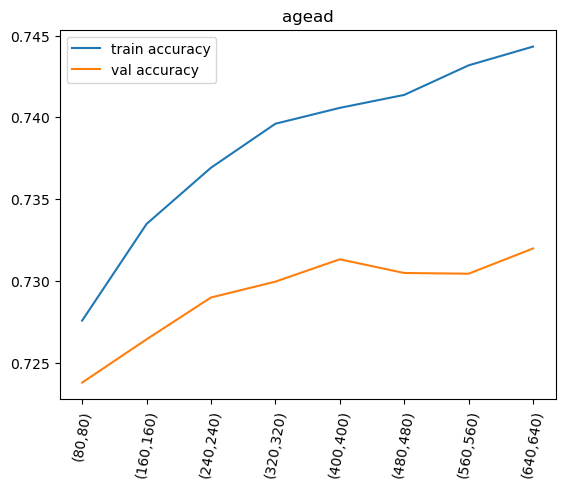

In [31]:
print(accForDifferentArchs)
#[(0.6893422901630402, 0.6912806630134583), (0.7057320773601532, 0.702559769153595), (0.7106665968894958, 0.7072740495204926), (0.7189055979251862, 0.717143177986145), (0.7233555018901825, 0.7196104526519775), (0.7252500653266907, 0.7233112752437592), (0.7262633740901947, 0.7223420143127441), (0.7286424934864044, 0.7240162789821625), (0.7305812239646912, 0.7249415516853333)]

#for i*10,i*10

#[(0.7208442687988281, 0.7199629545211792), (0.7291272282600403, 0.7244568467140198), (0.734326183795929, 0.7273647487163544), (0.7357801496982574, 0.7286864817142487)]
#i*80 i*80

#Plot it
plt.plot([x[0] for x in accForDifferentArchs])
plt.plot([x[1] for x in accForDifferentArchs])
plt.legend(['train accuracy','val accuracy'])
plt.title('agead')

plt.xticks(range(8), [f"({x*80},{x*80})" for x in range(1,9)], rotation=80)

In [ ]:
#plot results vs nnparams
plt.scatter(range(len(toTest)),[x[0] for x in results])
plt.scatter(range(len(toTest)),[x[1] for x in results])

#add legends to the graphs
plt.legend(['train accuracy','val accuracy'])

plt.show()
print(results)

#toTest=[[5,10],[10,10],[20,10],[50,10],[5,20],[10,20],[30,20],[50,20]]
#[(0.59551842212677, 0.5577639818191529), (0.6609061121940613, 0.6266252636909485), (0.6342977166175843, 0.5979710102081299), (0.7018694639205932, 0.6842236042022705), (0.6422088027000428, 0.6036853075027466), (0.6501199007034302, 0.6122567296028137), (0.6702096223831177, 0.6351966857910156), (0.6881978273391723, 0.6553209304809571)]



# BOOSTING

In [38]:
import time
#now with boosting and small decision trees (number of weak learners)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#fit tree classifier

from sklearn.tree import DecisionTreeClassifier
#import accuracy score
from sklearn.metrics import accuracy_score

#plot depth vs accuracy
val_accuracies=[]
train_accuracies=[]
FOLDS=1
PARAMRANGE=range(1,50)
for i in PARAMRANGE:  #1,30 is the range of max_depth

    #divide into train and validation, implementing cross validation

    val_average=0
    train_average=0
    for j in range(FOLDS): #5 fold cross validation

        
        
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=j)
        #fit tree classifier
        
        #start time
        start_time = time.time()

        base_classifier = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=1,random_state=1)

        # Create an AdaBoost classifier using the base classifier


        adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=i*2, random_state=1)


            # Train the AdaBoost classifier
        adaboost_classifier.fit(X_train, y_train)

        #end time
        print("--- %s seconds ---" % (time.time() - start_time))

            # Make predictions on the test set
        y_pred = adaboost_classifier.predict(X_val)

          


        val_average+=(accuracy_score(y_val, y_pred))
        y_pred_train = adaboost_classifier.predict(X_train)
        train_average+=(accuracy_score(y_train, y_pred_train))


    val_accuracies.append(val_average/FOLDS)
    train_accuracies.append(train_average/FOLDS)
    




import matplotlib.pyplot as plt

print(val_accuracies)
print(train_accuracies)

--- 0.16907811164855957 seconds ---
--- 0.28486084938049316 seconds ---
--- 0.4622468948364258 seconds ---
--- 0.5211379528045654 seconds ---
--- 0.719822883605957 seconds ---
--- 0.6144731044769287 seconds ---
--- 0.6797771453857422 seconds ---
--- 0.7671358585357666 seconds ---
--- 0.8731181621551514 seconds ---
--- 1.0111558437347412 seconds ---
--- 1.2087421417236328 seconds ---
--- 1.1552658081054688 seconds ---
--- 1.3321547508239746 seconds ---
--- 1.332226037979126 seconds ---
--- 1.4821407794952393 seconds ---
--- 1.5316498279571533 seconds ---
--- 1.6048650741577148 seconds ---
--- 1.7048521041870117 seconds ---
--- 1.8059349060058594 seconds ---
--- 1.917659044265747 seconds ---
--- 1.9796159267425537 seconds ---
--- 2.0695033073425293 seconds ---
--- 2.1517250537872314 seconds ---
--- 2.256226062774658 seconds ---
--- 2.6208181381225586 seconds ---
--- 2.4690983295440674 seconds ---
--- 2.558838129043579 seconds ---
--- 2.6372690200805664 seconds ---
--- 2.7201108932495117 

In [13]:

def mult(arr,scalar):
    return [x*scalar for x in arr]

0.7268722466960352


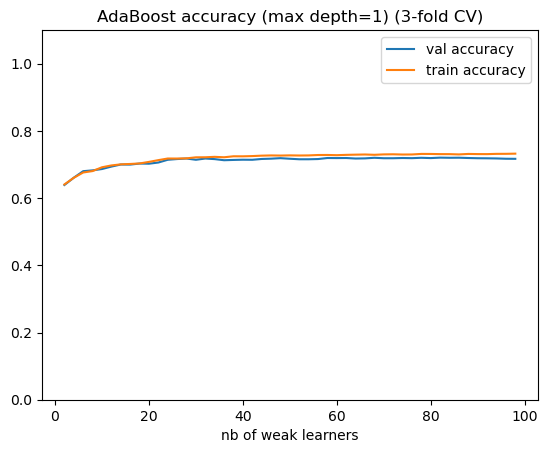

In [39]:


plt.plot(mult(PARAMRANGE,2),val_accuracies)
plt.plot(mult(PARAMRANGE,2),train_accuracies)

#add legends to the graphs
plt.legend(['val accuracy','train accuracy'])
plt.xlabel('nb of weak learners')
plt.title('AdaBoost accuracy (max depth=1) (3-fold CV)')
#rescale the y axis to show 0
plt.ylim(0,1.1)


base_classifier = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=1,random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=1)

        # Create an AdaBoost classifier using the base classifier


adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=200, random_state=1)


    # Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)



    # Make predictions on the test set

y_pred = adaboost_classifier.predict(X_val)
print(accuracy_score(y_val, y_pred))

# k-NN

In [35]:
#with kNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a k-NN classifier with 7 neighbors: knn









#now with boosting and small decision trees (number of weak learners)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#fit tree classifier

from sklearn.tree import DecisionTreeClassifier
#import accuracy score
from sklearn.metrics import accuracy_score

#plot depth vs accuracy
val_accuracies=[]
train_accuracies=[]
FOLDS=5
PARAMRANGE=range(40,41)
for i in PARAMRANGE:  #1,30 is the range of max_depth

    #divide into train and validation, implementing cross validation

    val_average=0
    train_average=0
    for j in range(FOLDS): #5 fold cross validation
        
        X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=j)
        #fit tree classifier
        


        knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')

        # Fit the classifier to the training data
        knn.fit(X_train,y_train)

        # Predict the labels of the test data: y_pred
        y_pred = knn.predict(X_val)




          


        val_average+=(accuracy_score(y_val, y_pred))
        y_pred_train = knn.predict(X_train)
        train_average+=(accuracy_score(y_train, y_pred_train))


    val_accuracies.append(val_average/FOLDS)
    train_accuracies.append(train_average/FOLDS)
    


print(val_accuracies)
print(train_accuracies)

import matplotlib.pyplot as plt
plt.plot(mult(PARAMRANGE,20),val_accuracies)
plt.plot(mult(PARAMRANGE,20),train_accuracies)

#add legends to the graphs
plt.legend(['val accuracy','train accuracy'])
plt.xlabel('number of neighbors')
plt.title('kNN accuracy (5-fold CV)')
#rescale the y axis to show 0
plt.ylim(0.6,1)





: 

[0.636784140969163, 0.6481277533039648, 0.6741189427312775, 0.6772026431718061, 0.6898678414096916, 0.6924008810572687, 0.6959251101321586, 0.7, 0.698568281938326, 0.7041850220264317, 0.7018722466960352, 0.7044052863436123, 0.7040748898678414, 0.7083700440528634, 0.7080396475770925, 0.7088105726872247, 0.7044052863436123, 0.7070484581497798, 0.7058370044052864, 0.7098017621145374, 0.7075991189427313, 0.7088105726872247, 0.708920704845815, 0.7102422907488988, 0.707488986784141, 0.7093612334801762, 0.7124449339207048, 0.7114537444933922, 0.7093612334801762, 0.7122246696035242, 0.7110132158590308, 0.7124449339207048, 0.7088105726872247, 0.7137665198237886, 0.7100220264317181, 0.7136563876651982, 0.7113436123348018, 0.712885462555066, 0.7127753303964758]


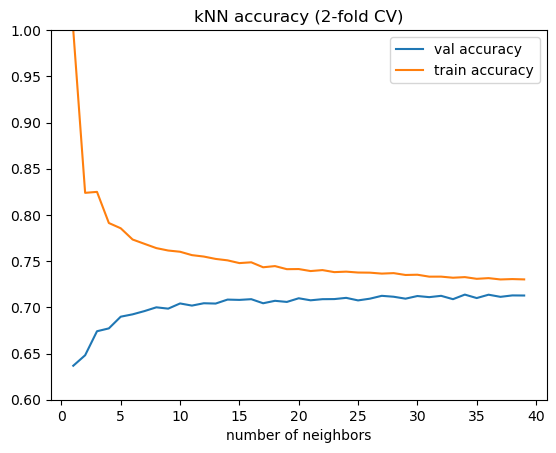

In [11]:
import matplotlib.pyplot as plt
plt.plot(PARAMRANGE,val_accuracies)
plt.plot(PARAMRANGE,train_accuracies)

#add legends to the graphs
plt.legend(['val accuracy','train accuracy'])
plt.xlabel('number of neighbors')
plt.title('kNN accuracy (2-fold CV)')
#rescale the y axis to show 0
plt.ylim(0.6,1)


print(val_accuracies)


In [5]:
#kNN on the whole X with 17 neighbors
#import Knn
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
#time
start_time = time.time()
# Fit the classifier to the training data
knn.fit(X,y)
print("--- %s seconds ---" % (time.time() - start_time))

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)


#accurracy
print(accuracy_score(y_test, y_pred))


: 